# In few words about tree search: BFS and DFS

In [25]:
%matplotlib inline
from IPython.display import Image
#Image("img/graph-types.png");
#Image("img/tree-terms.png");

## 1 Graphs 

A **graph** data structure consists of:
 - a finite set of vertices **$V$**(also called nodes or points),
 - a finite set of edges **$E$** (unordered pairs of these vertices for an undirected graph or ordered pairs for a directed graph)

![Types](img/graph-types.png)

Real life objects described by graph models:
- Friendship in the social network  => undirected unweighted graph
- Subscription to events in the social network => directed unweighted graph
- Quoting in articles => directed unweighted graph
- Correspondence (emails, messages, sms) => directed weighted graph
- Web pages => directed weighted graph

**Question 1**: Can you give an example for each graph:
 - undirected graph
 - directed graph
 - unweighted graph
 - weighted graph

**Question 2**: What these graph models are?
- Actors in Movies => ?
- Python Package Dependencies => ?

## 2 Trees

Trees are a collection of nodes (vertices), and they are linked with edges (pointers), representing the hierarchical connections between the nodes. A node contains data of any type, but all the nodes must be of the same data type. Trees are similar to graphs, but a cycle cannot exist in a tree.

### 2.1 main terms for a Tree

 - **Root**: The root of a tree is a node that has no incoming edges i.e. *start point* of your tree.

 - **Children**: The child of a tree is a node with one incoming edge from a node above it (i.e. from a parent node). If two children nodes share the same parent, they are called siblings.

 - **Parent**: The parent node has an outgoing edge connecting it to one or more child nodes.

 - **Leaf**: A leaf has a parent node but has no outgoing edge to a child node i.e. this as an *end point* of your tree.

 - **Subtree**: A subtree is a smaller tree held within a larger tree. The root of that tree can be any node from the bigger tree.

 - **Depth** : The depth of a node is the number of edges between that node and the root i.e. how many steps there are between your node and the tree’s start point.

 - **Height** : The height of a node is the number of edges in the longest path from a node to a leaf node. Think of this as how many steps there are between your node and the tree’s endpoint. The height of a tree is the height of its root node.

 - **Degree**: The degree of a node refers to the number of sub-trees.

![Terms](img/tree-terms.png)

Trees can be applied to many things. The hierarchical structure gives a tree unique properties for storing, manipulating, and accessing data. Trees form some of the most basic organization of computers. We can use a tree for the following:

- **Storage as hierarchy.** Storing information that naturally occurs in a hierarchy. File systems on a computer and PDF use tree structures.
- **Searching.** Storing information that we want to search quickly. Trees are easier to search than a Linked List. Some types of trees (like AVL and Red-Black trees) are designed for fast searching.
- **Inheritance.** Trees are used for inheritance, XML parser, machine learning, and DNS, amongst many other things.
- **Indexing.** Advanced types of trees, like B-Trees and B+ Trees, can be used for indexing a database.
- **Networking.** Trees are ideal for things like social networking and computer chess games.
- **Shortest path.** A Spanning Tree can be used to find the shortest paths in routers for networking.

and much more


## 3 Tree search

main defenitions and pictures about it

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class Node:

    def __init__(self, data, x=0, y=0, dx=4, dy=1):
        self.left = None
        self.right = None
        self.data = data
        # for draw graph
        self.coord = x, y
        self.dx = dx
        self.dy = dy

    #incert method to create nodes
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data, self.coord[0]-self.dx, self.coord[1]-self.dy, (self.dx)/2 )
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Node(data, self.coord[0]+self.dx, self.coord[1]-self.dy,(self.dx)/2)
                else:
                    self.right.insert(data)
        else:
            self.data = data

#find_val method to compare the value with nodes

    def findval(self, lkpval):
        if lkpval < self.data:
            if self.left is None:
                return str(lkpval)+' is not found'
            return self.left.findval(lkpval)
        elif lkpval > self.data:
            if self.right is None:
                return str(lkpval) + ' is not found'
            return self.right.findval(lkpval)
        else:
            return str(self.data) + ' is found'

    #print sort the Tree
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data)
        if self.right:
            self.right.PrintTree()

    def draw_from_root(self):
        fig = plt.figure(figsize=(4*self.dx, 4*self.dy))
        ax = plt.subplot(1, 1, 1)
        plt.title(f' Tree ')
        self.draw_tree(ax)
        plt.xlim(-2*self.dx, 2*self.dx)
        plt.ylim(-4*self.dy-1, 1)
        plt.show()

    def draw_tree(self, ax):
        print(self.data, self.coord)
        ax.annotate(self.data, self.coord,
                    ha='center', va='center', fontsize=11,
                    color='black', rotation=0)
        radius = (self.dy) / 4
        circle = mpatches.Circle(self.coord, radius=radius, color='orange')
        ax.add_patch(circle)
        if self.left:
            ax.plot([self.coord[0], self.left.coord[0]],
                    [self.coord[1]-radius, self.left.coord[1]+radius],
                    color='orange', linewidth=2)
            self.left.draw_tree(ax)
        if self.right:
            ax.plot([self.coord[0], self.right.coord[0]],
                    [self.coord[1] - radius, self.right.coord[1] + radius],
                    color='orange', linewidth=2)
            self.right.draw_tree(ax)

10
14
19
27
29
31
35
37
7 is not found
14 is found
27 (0, 0)
14 (-4, -1)
10 (-6.0, -2)
19 (-2.0, -2)
35 (4, -1)
31 (2.0, -2)
29 (1.0, -3)
37 (6.0, -2)


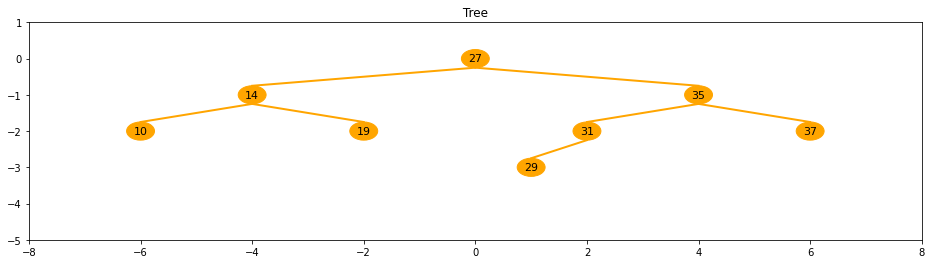

In [37]:
root = Node(27)
root.insert(14)
root.insert(35)
root.insert(31)
root.insert(10)
root.insert(19)
root.insert(29)
root.insert(37)
root.PrintTree()
print(root.findval(7))
print(root.findval(14))
root.draw_from_root()

## 4 BFS and DFS

examples, algorithms and  tasks like 
 - what next step will be?
 - what else it can be?

### 4.1 Depth-First Search

*Overview*: We follow a path from the starting node to the ending node and then start another path until all nodes are visited. This is commonly implemented using stacks, and it requires less memory than BFS. It is best for topographical sorting, such as graph backtracking or cycle detection.

The steps for the **DFS** algorithm are as follows:

1. Pick a node. Push all adjacent nodes into a stack.
2. Pop a node from that stack and push adjacent nodes into another stack.
3. Repeat until the stack is empty or you have reached your goal. As you visit nodes, you must mark them as visited before proceeding, or you will be stuck in an infinite loop.

### 4.2 Breadth-First Search

*Overview*: We proceed level-by-level to visit all nodes at one level before going to the next. The BFS algorithm is commonly implemented using queues, and it requires more memory than the DFS algorithm. It is best for finding the shortest path between two nodes.

The steps for the **BFS** algorithm are as follows:

1. Pick a node. Enqueue all adjacent nodes into a queue. Dequeue a node, and mark it as visited. Enqueue all adjacent nodes into another queue.
2. Repeat until the queue is empty of you have met your goal.
3. As you visit nodes, you must mark them as visited before proceeding, or you will be stuck in an infinite loop.
